# Лабораторна робота №2 
### Диференційні рівняння
Авраменко Нікіта, група коп'ютерна математика

## Варіант 2
Приклад:
$$
\large\begin{cases}
    \dot{x}=-2x+3y\\
    \dot{y}=x-y
  \end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D
from sympy.solvers import solve
from sympy import Symbol

# Задача 1
### Завдання 1. 
Знайти, під яким кутом фазові траєкторії перетинают пряму $y=x$.

In [2]:
from sympy.abc import x,y
from sympy import*
f1 = (x-y)/(-2*x+3*y)                         #dy/dx = (x-y)/(-2*x+3*y)
f2 = x                                        #пряма y=x
tg = (diff(f2,x)-f1)/(1+diff(f2,x)*f1)        #формула для тангеса
answer = []                                   #можемо взяти будь-яку точку
for i in np.arange(1,10,0.1):                 #але на всяк випадок перевіримо, что для кожної кривої однаковій кут
    reps = [(y, i), (x, i)]
    answer.append(tg.subs(reversed(reps)))    #підставляємо значення у формулу
print(f'tg(a) = {answer[0]}')
print(len(answer) == answer.count(1))         #перевыряэмо, що всі тангенси однакові
print(f'Кут а={np.arctan(int(answer[0]))}')   #знаходимо значення кута

tg(a) = 1
True
Кут а=0.7853981633974483


Фазові траєкторії перетинают пряму під кутом $\frac{\pi}{4}$

### Завдання 2. 
Для фазових траєкторій, що примикають до початку координат, знайти кут, під яким вони примикають до початку т.(0,0).

In [3]:
reps = [(y, 0), (x, 0)]
ans = tg.subs(reversed(reps))
print(f'tg(a) = {ans}')
print(f'Кут a={np.arctan(int(ans))}')

tg(a) = 2
Кут a=1.1071487177940904


### Завдання 3. 
Зобразити фазові траєкторії

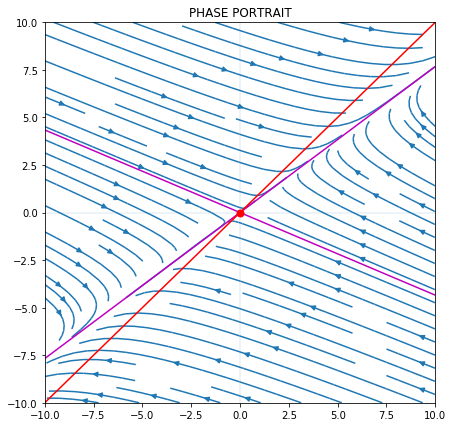

In [12]:
l = 10
plt.xlim(-l, l)
plt.ylim(-l, l)

a = np.array([[-2,3],[1,-1]])
w, v = np.linalg.eig(a)

plt.rcParams["figure.figsize"] = (7,7)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
axes()

plt.plot([0], [0], 'ro', markersize=7)

x = np.linspace(-l, l, 400)
y = np.linspace(-l, l, 400)
X, Y = np.meshgrid(x, y)

U = -2*X + 3*Y
V = X - Y
plt.streamplot(X, Y, U, V)

x, y = np.meshgrid(x, y)
plt.contour(x, y, (x/v[0,0] - y/v[1,0]), 0, colors = "m")
plt.contour(x, y, (x/v[0,1] - y/v[1,1]), 0,colors = "m")
plt.contour(x, y, (y-x), 0,colors = "r")

plt.title('PHASE PORTRAIT')
plt.show()

# Задача 2
Приклад:
$$
\large\begin{cases}
    \dot{x}=-2y(x-y)\\
    \dot{y}=2+x-y^2
  \end{cases}
$$
### Завдання 1. 
Знайти всі положення рівноваги системи диференціальних рівнянь, для кожного з положень рівноваги записати відповідну систему першого наближення.

In [5]:
from sympy.abc import x,y
fx = -2*y*(x-y)
fy = 2+x-y**2
h = solve(fx,y,dict = False)
dots = []
for i in range(len(h)):
    print(f'y={h[i]}')
    g = solve(fy.subs(y,h[i]),x)
    print(f'x: {g}')
    for j in range(len(g)):
        dots.append((int(g[j]),int(h[i].subs(x,g[j]))))

y=0
x: [-2]
y=x
x: [-1, 2]


Положення рівноваги:

In [6]:
dots 

[(-2, 0), (-1, -1), (2, 2)]

Якобіан:

In [7]:
mtr = np.array([[diff(fx,x),diff(fx,y)],[diff(fy,x),diff(fy,y)]])
mtr

array([[-2*y, -2*x + 4*y],
       [1, -2*y]], dtype=object)

In [8]:
from copy import copy

mtrix = []
a = np.ones(mtr.shape)
a = a.astype('int32')
for dot in dots:
    reps = [(y, dot[0]), (x, dot[1])]
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            a[i,j] = mtr[i,j].subs(reversed(reps))
    mtrix.append(copy(a))
    print(a)
    print('')
            
            

[[ 4 -8]
 [ 1  4]]

[[ 2 -2]
 [ 1  2]]

[[-4  4]
 [ 1 -4]]



### Завдання 2. 
Зобразити на фазовій площині напрямки векторного поля у точках $(m,n)$, де $m = {-6 , -5, \ldots , 6}, \enspace  n = {-6 , -5, \ldots , 6}$

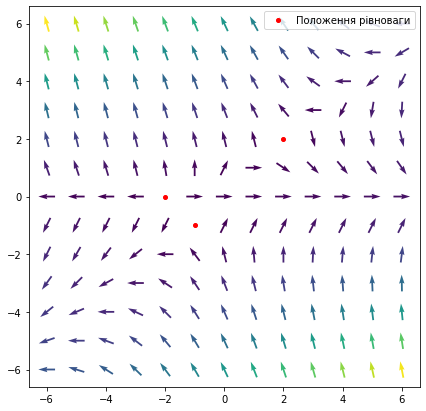

In [9]:
np.seterr(divide='ignore', invalid='ignore')

def fun(P):
    return [P[0],(2+P[0]-P[1]**2)/(-2*P[0]*(P[0]-P[1]))]

x = np.linspace(-6,6,13)
y = np.linspace(-6,6,13)

x,y = np.meshgrid(x,y)
DX1 = -2*y*(x-y)
DY1 =  2+x-y**2
M = (np.hypot(DX1, DY1))
DX1 /= M
DY1 /= M
plt.quiver(x, y, DY1, DX1, M, pivot='mid', cmap=plt.cm.viridis)
plt.plot([dot[0] for dot in dots],[dot[1] for dot in dots],'ro', label = 'Положення рівноваги', markersize=4)
plt.legend()
plt.show()

### Завдання 3.
Дослідити на стійкість усі положення рівноваги

In [10]:
from numpy import linalg as LA


for mt in mtrix:
    w, v = LA.eig(mt)
    if all(w.real <0):
        print(f'Матриця:\n{mt}\nСтійка\nДійсна частина власних чисел: {w.real}\n')
    else:
        print(f'Матриця:\n{mt}\nНе стійка\nДійсна частина власних чисел: {w.real}\n')
    

Матриця:
[[ 4 -8]
 [ 1  4]]
Не стійка
Дійсна частина власних чисел: [4. 4.]

Матриця:
[[ 2 -2]
 [ 1  2]]
Не стійка
Дійсна частина власних чисел: [2. 2.]

Матриця:
[[-4  4]
 [ 1 -4]]
Стійка
Дійсна частина власних чисел: [-2. -6.]



### Завдання 4.
Зобразити на фазовій площині фазові траєкторії в околах положень рівноваги.

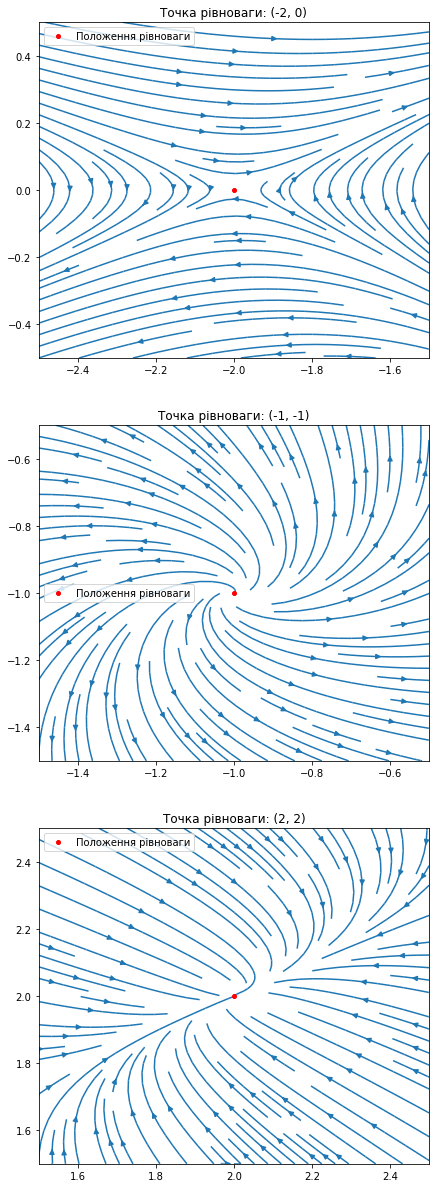

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(7,21))

#a = np.array([[-2,3],[1,-1]])
#w, v = np.linalg.eig(a)

def axes():
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)
axes()

for ind, dot in enumerate(dots):
    l = 0.5
    x = np.linspace(dot[0]-l, dot[0]+l, 1000)
    y = np.linspace(dot[1]-l, dot[1]+l, 1000)
    x, y = np.meshgrid(x, y)
    U = -2*y*(x-y)
    V = 2+x-y**2
    axs[ind].streamplot(x, y, U, V)
    axs[ind].plot(dot[0],dot[1],'ro', label = 'Положення рівноваги', markersize=4)
    axs[ind].legend()
    axs[ind].set_xlim(dot[0]-l, dot[0]+l)
    axs[ind].set_ylim(dot[1]-l, dot[1]+l)
    axs[ind].set_title(f'Точка рівноваги: {dot}')

